<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="ffffff">
Resnet code

</font>
</h1>

pariya branch

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [20]:

def custom_preprocess_input(img):
    img = tf.image.resize(img, (224, 224)) # resize the images to the same size
    img = tf.cast(img, tf.float32) # convert the image data type to float32
    img = img / 255.0 # normalize the pixel values
    img = resnet_preprocess_input(img) # preprocess the image using ResNet50 preprocessing function
    return img

# set common data augmentation parameters
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# load training data
train_ds = ImageDataGenerator(preprocessing_function=custom_preprocess_input).flow_from_directory(
    r'E:\projectDataset\archive\sl_train',
    class_mode='categorical',
    target_size=(224,224),
    shuffle=True,
    batch_size=32
)

# load testing data
test_ds = ImageDataGenerator(preprocessing_function=custom_preprocess_input).flow_from_directory(
    r'E:\projectDataset\archive\sl_test',
    class_mode='categorical',
    target_size=(224,224),
    shuffle=False,
    batch_size=32
)

# load validation data
val_ds = ImageDataGenerator(preprocessing_function=custom_preprocess_input).flow_from_directory(
    r'E:\projectDataset\archive\sl_valid',
    class_mode='categorical',
    target_size=(224,224),
    shuffle=True,
    batch_size=32
)

# load validation data
fuck_ds = ImageDataGenerator(preprocessing_function=custom_preprocess_input).flow_from_directory(
    r'E:\projectDataset\000000000000000000testfuck',
    class_mode='categorical',
    target_size=(224,224),
    shuffle=True,
    batch_size=32
)

# load validation data
fuck2_ds = ImageDataGenerator(preprocessing_function=custom_preprocess_input).flow_from_directory(
    r'E:\projectDataset\000000000000000000',
    class_mode='categorical',
    target_size=(224,224),
    batch_size=32
)

Found 2907 images belonging to 12 classes.
Found 1166 images belonging to 12 classes.
Found 1420 images belonging to 12 classes.
Found 9 images belonging to 1 classes.
Found 24 images belonging to 12 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

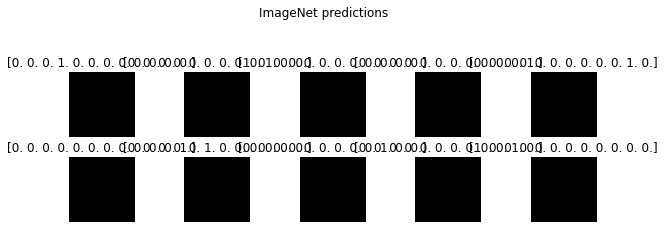

In [21]:
image_batch, label_batch = train_ds.next()

plt.figure(figsize=(10,9))
for n in range(10):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  plt.title(label_batch[n])
  
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

In [3]:

# load ResNet50 pre-trained model
base_model = ResNet50(weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False)

# set base model to trainable
base_model.trainable = True

base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [4]:
fine_tune_at = 140

# freeze layers before fine-tune layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [5]:
# build classification model on top of ResNet50
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(12, activation='softmax'))

# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                780       
Total params: 49,320,012
Trainable params: 40,710,348
Non-trainable params: 8,609,664
____________________________________

In [6]:

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:

# set early stopping callback to prevent overfitting
early_stopping = EarlyStopping(patience=10)
model_checkpoint = ModelCheckpoint(
    "../Checkpoints/my_checkpoint_custome_functon_process", save_best_only=True)

# fine-tune the model
history = model.fit(
    train_ds,
    batch_size=64,
    epochs=10,
    #epochs=27,
    validation_data=val_ds,
  #  initial_epoch=22,
    callbacks=[early_stopping,model_checkpoint]
)

Epoch 1/10
91/91 [==============================] - 535s 6s/step - loss: 2.1735 - accuracy: 0.2391 - val_loss: 15.8091 - val_accuracy: 0.0718
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_custome_functon_process\assets
Epoch 2/10
91/91 [==============================] - 535s 6s/step - loss: 1.4709 - accuracy: 0.4579 - val_loss: 45.5743 - val_accuracy: 0.0739
Epoch 3/10
91/91 [==============================] - 539s 6s/step - loss: 1.3004 - accuracy: 0.5077 - val_loss: 17.4292 - val_accuracy: 0.0817
Epoch 4/10
91/91 [==============================] - 543s 6s/step - loss: 1.1501 - accuracy: 0.5566 - val_loss: 11.8145 - val_accuracy: 0.0944
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_custome_functon_process\assets
Epoch 5/10
91/91 [==============================] - 551s 6s/step - loss: 0.9779 - accuracy: 0.6223 - val_loss: 1.8349 - val_accuracy: 0.4697
INFO:tensorflow:Assets written to: ../Checkpoints\my_checkpoint_custome_functon_process\assets
Epoch 

In [9]:
test_loss, test_accuracy = model.evaluate(test_ds)#, steps=len(test_ds)/2
print('Accuracy on test dataset:', test_accuracy)

37/37 [==============================] - 160s 4s/step - loss: 5.3929 - accuracy: 0.1913
Accuracy on test dataset: 0.19125214219093323


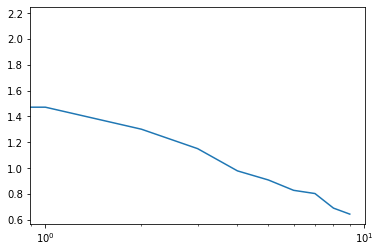

In [10]:
plt.semilogx( history.history["loss"])

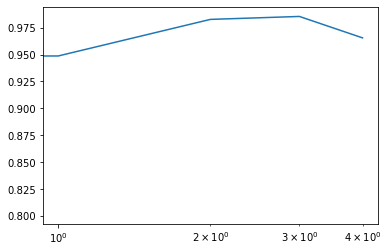

In [ ]:
plt.semilogx( history.history["accuracy"])

In [11]:
model.save('../models/fruit_disease_classifier_resnet_custome_process_function.h5')

In [12]:

######یادت باشه دیتاها رو تغییر دادی طول میکشه چون داده ها ما خیل هستن 
predicted_batch = model.predict(train_ds)
import numpy as np
predicted_ids = np.argmax(predicted_batch, axis=-1)
class_names = list(train_ds.class_indices.keys())
predicted_class_names = [class_names[id] for id in predicted_ids]

image_batch, label_batch = train_ds.next()


In [13]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

print('Test accuracy:', test_acc)


91/91 - 379s - loss: 2.1876 - accuracy: 0.5077
Test accuracy: 0.5077399611473083


['Beans_Angular_LeafSpot', 'Beans_Rust', 'Strawberry_Angular_LeafSpot', 'Strawberry_Anthracnose_Fruit_Rot', 'Strawberry_Blossom_Blight', 'Strawberry_Gray_Mold', 'Strawberry_Leaf_Spot', 'Strawberry_Powdery_Mildew_Fruit', 'Strawberry_Powdery_Mildew_Leaf', 'Tomato_Blight', 'Tomato_Leaf_Mold', 'Tomato_Spider_Mites']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


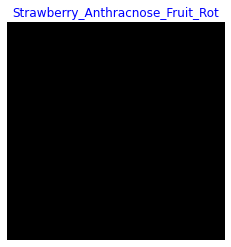

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.007', '0.027', '0.018', '0.393', '0.002', '0.019', '0.001', '0.354', '0.000', '0.153', '0.003', '0.022']


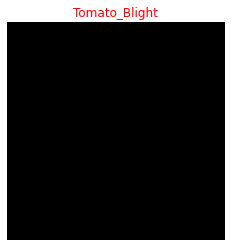

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.057', '0.090', '0.002', '0.011', '0.003', '0.086', '0.000', '0.618', '0.128', '0.003']


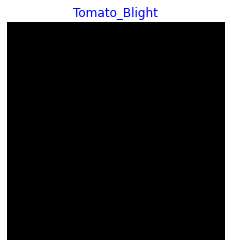

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.001', '0.000', '0.000', '0.000', '0.000', '0.000', '0.815', '0.099', '0.085']


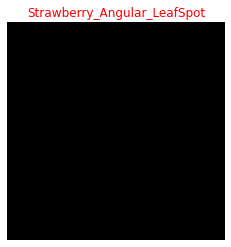

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
predicted: ['0.033', '0.019', '0.343', '0.164', '0.002', '0.003', '0.302', '0.059', '0.012', '0.053', '0.008', '0.001']


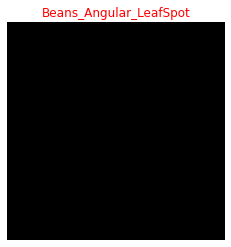

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.641', '0.357', '0.000', '0.001', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


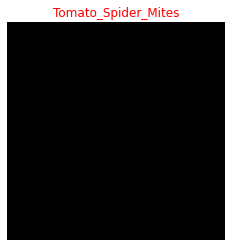

real label : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.053', '0.000', '0.947']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


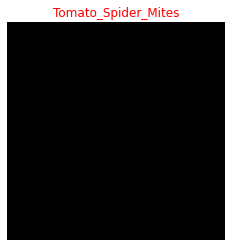

real label : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.002', '0.000', '0.998']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


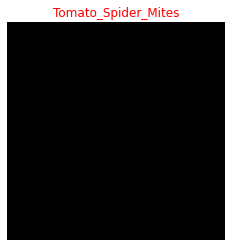

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.001', '0.000', '0.999']


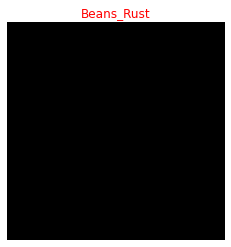

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
predicted: ['0.105', '0.888', '0.000', '0.000', '0.000', '0.000', '0.003', '0.001', '0.000', '0.001', '0.000', '0.000']


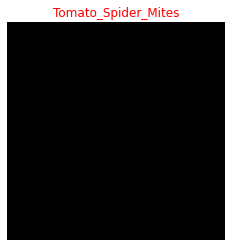

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.028', '0.000', '0.972']


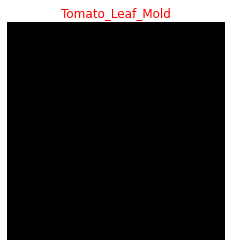

real label : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.377', '0.609', '0.015']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


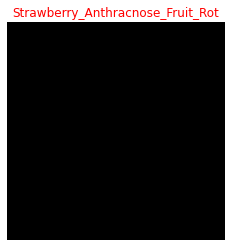

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.011', '0.549', '0.002', '0.047', '0.000', '0.109', '0.001', '0.251', '0.023', '0.007']


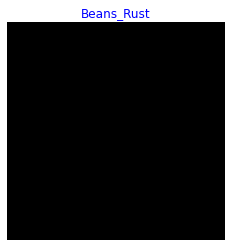

real label : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.082', '0.908', '0.000', '0.001', '0.000', '0.000', '0.005', '0.002', '0.001', '0.000', '0.000', '0.000']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


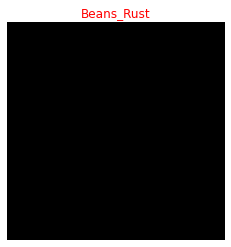

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
predicted: ['0.330', '0.669', '0.000', '0.001', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


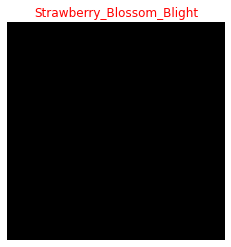

real label : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


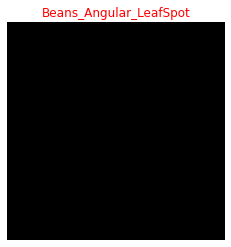

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
predicted: ['0.447', '0.155', '0.018', '0.003', '0.000', '0.000', '0.050', '0.005', '0.002', '0.317', '0.004', '0.000']


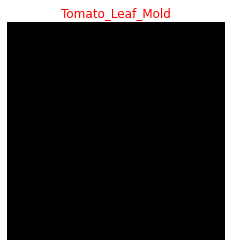

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.313', '0.681', '0.007']


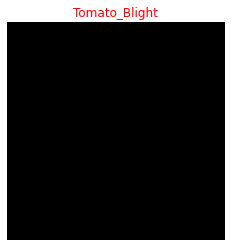

real label : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
predicted: ['0.001', '0.000', '0.031', '0.002', '0.000', '0.000', '0.007', '0.002', '0.000', '0.594', '0.361', '0.002']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


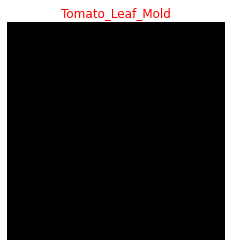

real label : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.166', '0.833', '0.002']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


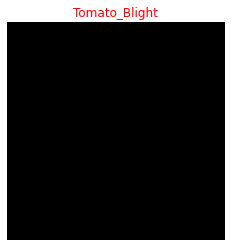

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
predicted: ['0.000', '0.000', '0.001', '0.001', '0.000', '0.000', '0.000', '0.000', '0.000', '0.948', '0.049', '0.001']


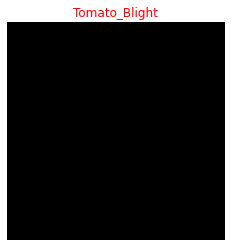

real label : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.611', '0.376', '0.014']


In [14]:


import matplotlib.pyplot as plt
print(class_names)
for n in range(21):
    plt.axis('off')
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == tf.math.argmax(label_batch[n]) else "red"
  #  plt.title(predicted_class_names[n], color=color)
    plt.title(predicted_class_names[n], color=color)
    plt.show()
    print('real label :',label_batch[n])
    my_formatted_list = [ '%.3f' % elem for elem in predicted_batch[n] ]
    print('predicted:', my_formatted_list)
    

#print(predicted_batch[n])




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

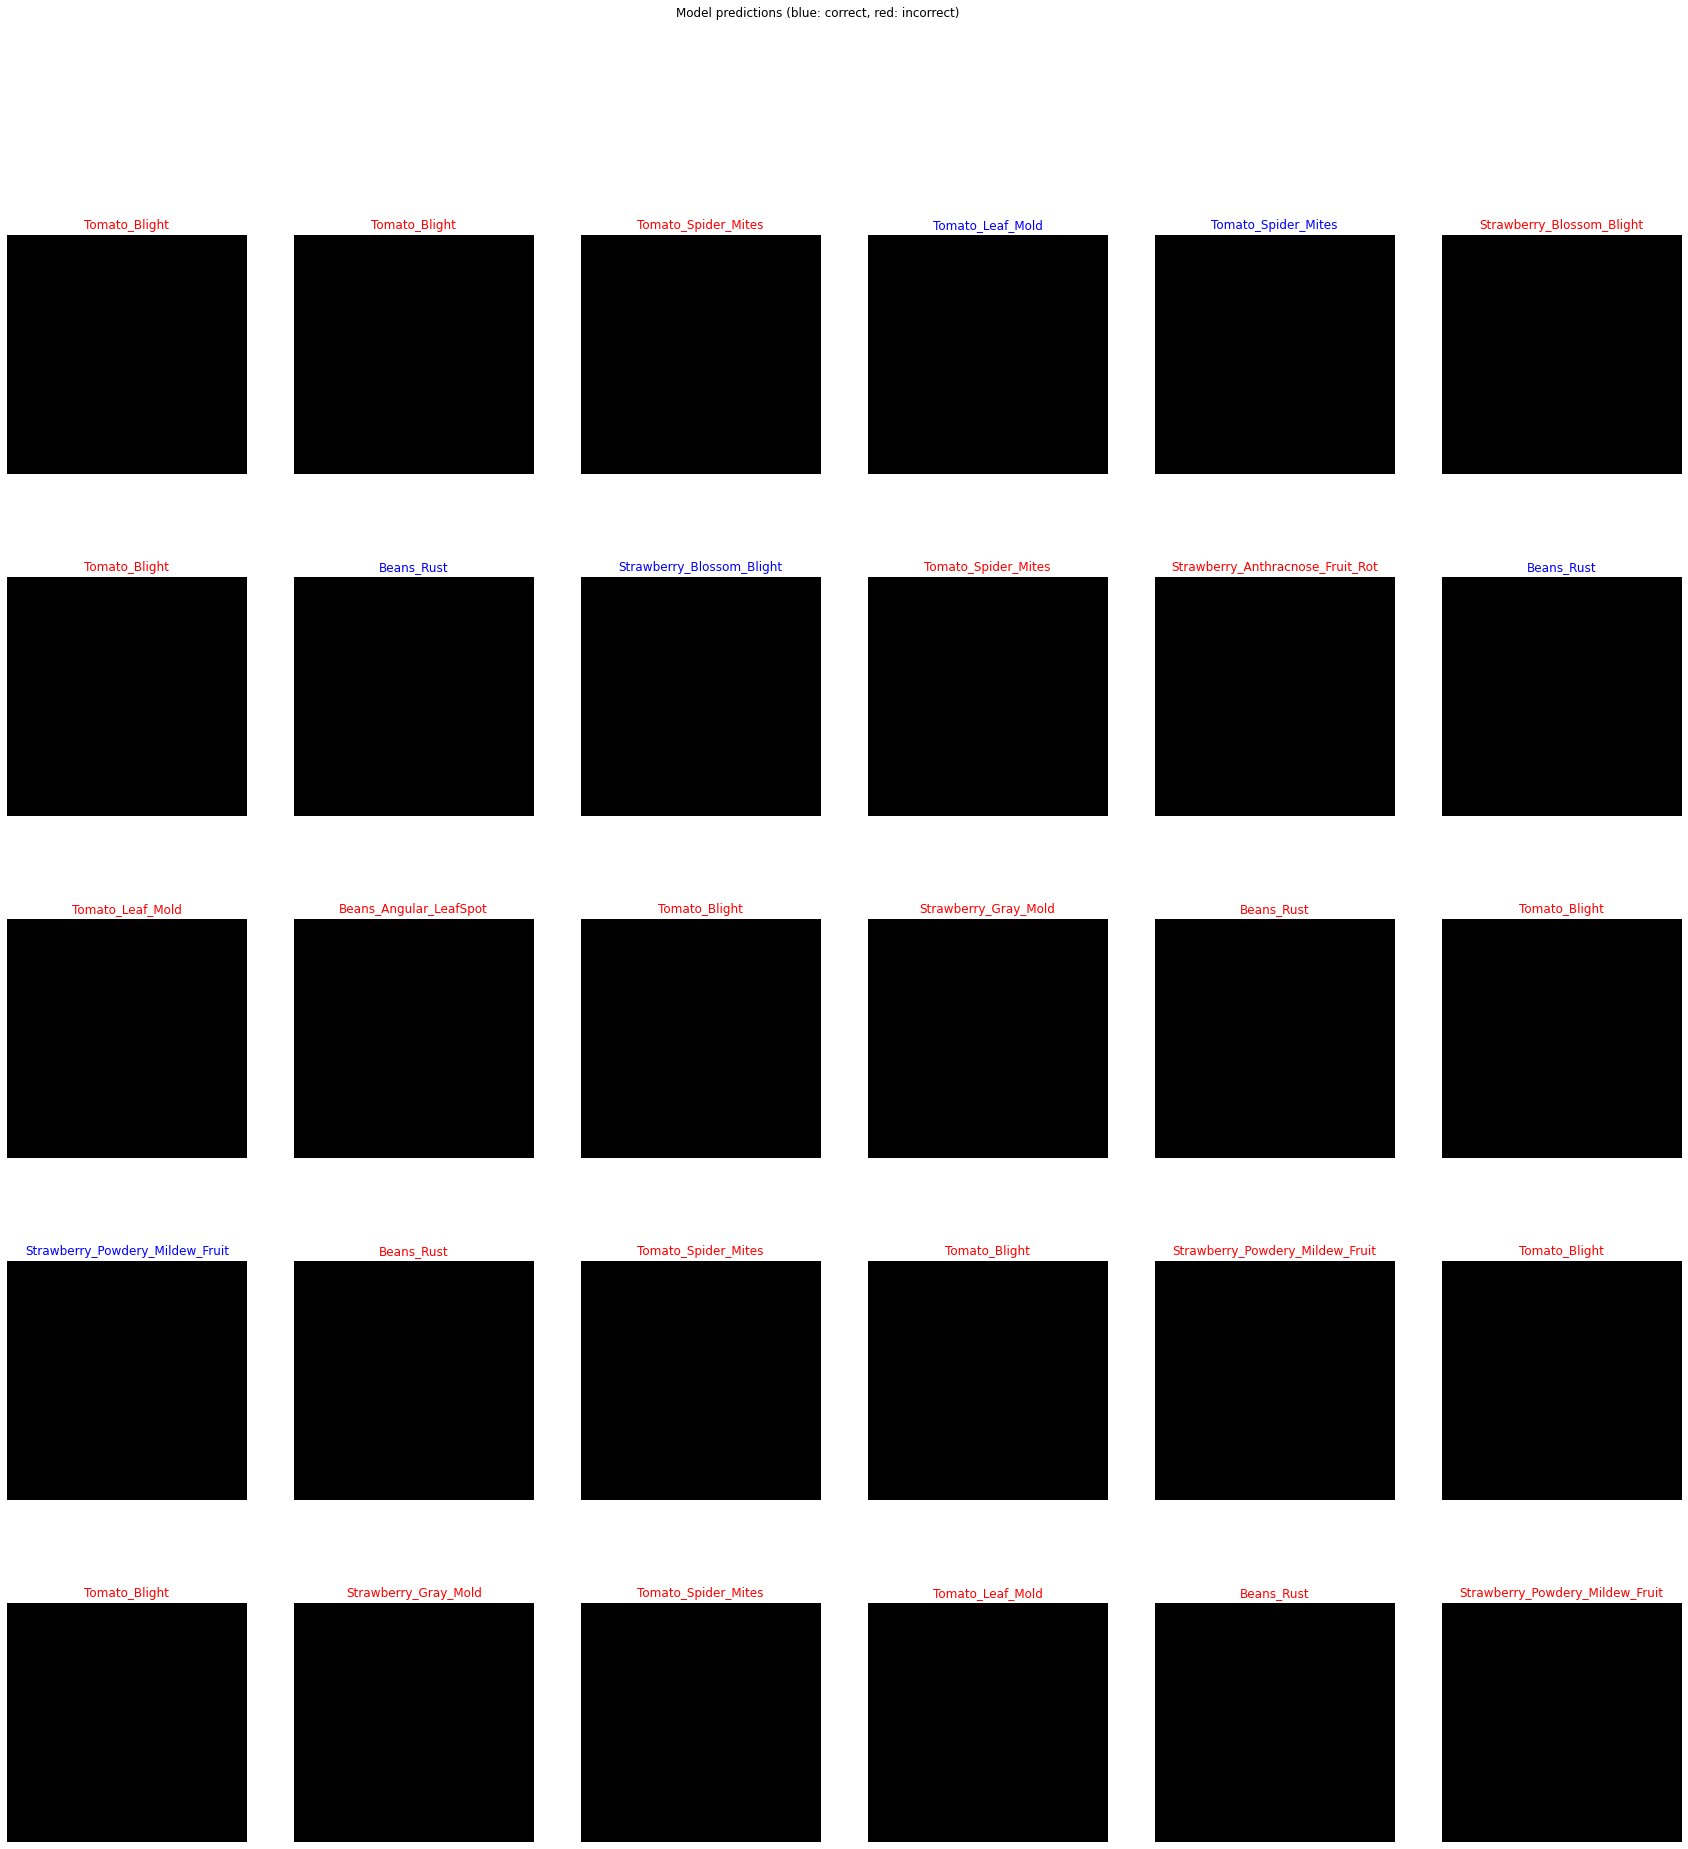

In [15]:


predicted_batch = model.predict(train_ds)
predicted_ids = np.argmax(predicted_batch, axis=-1)
class_names = list(train_ds.class_indices.keys())
predicted_class_names = [class_names[id] for id in predicted_ids]

import matplotlib.pyplot as plt
image_batch, label_batch = train_ds.next()

plt.figure(figsize=(30,30))
for n in range(30):
    plt.subplot(5,6,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == tf.math.argmax(label_batch[n]) else "red"
  #  plt.title(predicted_class_names[n], color=color)
    plt.title(predicted_class_names[n], color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


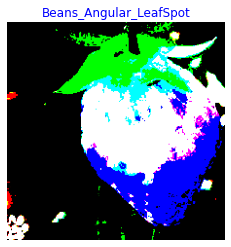

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [1.]
predicted: ['1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


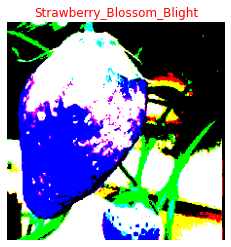

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [1.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


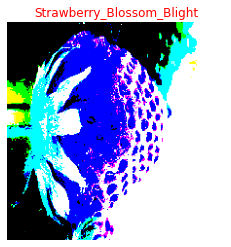

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [1.]
predicted: ['0.000', '0.000', '0.000', '0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


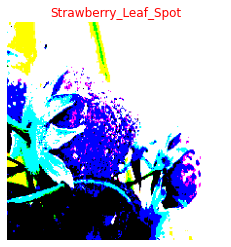

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [1.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000']


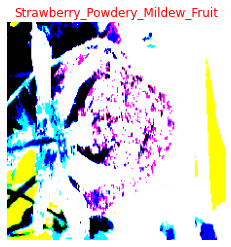

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [1.]
predicted: ['0.000', '0.000', '0.007', '0.000', '0.000', '0.000', '0.000', '0.993', '0.000', '0.000', '0.000', '0.000']


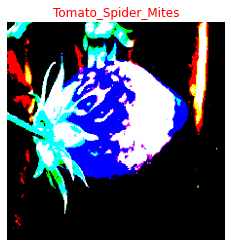

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [1.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.186', '0.000', '0.000', '0.000', '0.000', '0.000', '0.083', '0.732']


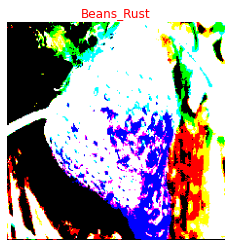

real label : [1.]
predicted: ['0.000', '1.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


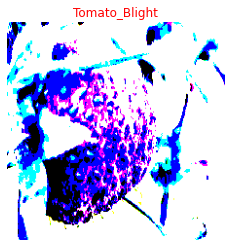

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


real label : [1.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '1.000', '0.000', '0.000']


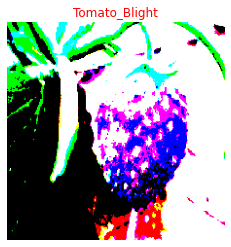

real label : [1.]
predicted: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '1.000', '0.000', '0.000']
